In [268]:
import pandas as pd
import numpy as np

In [269]:
auto_metrics = pd.read_csv("auto_metrics.csv")
FLAML_metrics = pd.read_csv("FLAML_Metrics.csv")
auto_models = pd.read_csv("auto_models.csv")
fedot_metrics = pd.read_csv("fedot_metrics.csv")
def add_model(df):
    df.insert(0, "Trial", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], True)
    
add_model(auto_metrics)
add_model(FLAML_metrics)
add_model(fedot_metrics)

In [270]:
am = auto_metrics.to_latex(index=False, float_format="{:20f}".format)
Fm = FLAML_metrics.to_latex(index=False)
amo = auto_models.to_latex(index=False, longtable=True)
fed = fedot_metrics.to_latex(index=False, float_format="{:20f}".format)

In [271]:
print(am)
print(Fm)
#print(amo)
print(fed)

\begin{tabular}{rrrrrl}
\toprule
 Trial &                  MSE &                 RMSE &                  MAE &                 MAPE &  Time \\
\midrule
     1 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m32s \\
     2 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m10s \\
     3 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m17s \\
     4 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m13s \\
     5 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m13s \\
     6 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m15s \\
     7 &       2297769.035377 &          1515.839383 &          1109.898298 &             8.452688 & 7m21s \\
     8 &       2297769.035377 &          1515.839383 &          1109.898298 & 

In [272]:
# get the best models
def get_min(df):
    print(df[["MSE"]].idxmin())
    print(df[["RMSE"]].idxmin())
    print(df[["MAE"]].idxmin())
    print(df[["MAPE"]].idxmin())

In [254]:
get_min(FLAML_metrics)
print("################")
get_min(auto_metrics)
print("################")
get_min(fedot_metrics)
print("################")

MSE    4
dtype: int64
RMSE    4
dtype: int64
MAE    4
dtype: int64
MAPE    4
dtype: int64
################
MSE    0
dtype: int64
RMSE    0
dtype: int64
MAE    0
dtype: int64
MAPE    0
dtype: int64
################
MSE    0
dtype: int64
RMSE    0
dtype: int64
MAE    0
dtype: int64
MAPE    0
dtype: int64
################


In [255]:
def get_miutes(df):
    time = []
    for i in range(len(df)):

        
        time_string = df["Time"][i]
        minutes_str, seconds_str = time_string.split('m')
        seconds_str = seconds_str.rstrip('s')  
        
        minutes = int(minutes_str)
        seconds = int(seconds_str)
        total_minutes = minutes + (seconds / 60)
        time.append(total_minutes)
    return time

tflaml = get_miutes(FLAML_metrics)
tauto = get_miutes(auto_metrics)
tfedot = get_miutes(fedot_metrics)
FLAML_metrics["minutes"] = tflaml
auto_metrics["minutes"] = tauto
fedot_metrics["minutes"] = tfedot

In [256]:
overview = pd.DataFrame(columns = ["Framework","MSE", "RMSE", "MAE","MAPE", "Time (min)"])

r1 = ["Autogluon",
      str(round(auto_metrics["MSE"].mean(),4)) + " \u00b1 " + str(round(auto_metrics["MSE"].std(),4)), 
      str(round(auto_metrics["RMSE"].mean(),4))+ " \u00b1 " + str(round(auto_metrics["RMSE"].std(),4)), 
      str(round(auto_metrics["MAE"].mean(),4))+ " \u00b1 " + str(round(auto_metrics["MAE"].std(),4)), 
      str(round(auto_metrics["MAPE"].mean(),4))+ " \u00b1 " + str(round(auto_metrics["MAPE"].std(),4)),
      str(round(auto_metrics["minutes"].mean(),4))+ " \u00b1 " + str(round(auto_metrics["minutes"].std(),4)),]  
                                                    
r2 = ["FLAML",
      str(round(FLAML_metrics["MSE"].mean(),4))+ " \u00b1 " + str(round(FLAML_metrics["MSE"].std(),4)),  
      str(round(FLAML_metrics["RMSE"].mean(),4))+ " \u00b1 " + str(round(FLAML_metrics["RMSE"].std(),4)),  
      str(round(FLAML_metrics["MAE"].mean(),4))+ " \u00b1 " + str(round(FLAML_metrics["MAE"].std(),4)),  
      str(round(FLAML_metrics["MAPE"].mean(),4))+ " \u00b1 " + str(round(FLAML_metrics["MAPE"].std(),4)),
      str(round(FLAML_metrics["minutes"].mean(),4))+ " \u00b1 " + str(round(FLAML_metrics["minutes"].std(),4)),] 

r3 = ["FEDOT",
      str(round(fedot_metrics["MSE"].mean(),4))+ " \u00b1 " + str(round(fedot_metrics["MSE"].std(),4)),  
      str(round(fedot_metrics["RMSE"].mean(),4))+ " \u00b1 " + str(round(fedot_metrics["RMSE"].std(),4)),  
      str(round(fedot_metrics["MAE"].mean(),4))+ " \u00b1 " + str(round(fedot_metrics["MAE"].std(),4)),  
      str(round(fedot_metrics["MAPE"].mean(),4))+ " \u00b1 " + str(round(fedot_metrics["MAPE"].std(),4)),
      str(round(fedot_metrics["minutes"].mean(),4))+ " \u00b1 " + str(round(fedot_metrics["minutes"].std(),4)),] 

overview.loc[len(overview)] = r2
overview.loc[len(overview)] = r1
overview.loc[len(overview)] = r3

In [257]:
print(overview.head())
comp = overview.to_latex(index=False)
print(comp)

   Framework                          MSE                  RMSE  \
0      FLAML          5654.9732 ± 76.6287       75.198 ± 0.5072   
1  Autogluon           2297769.0354 ± 0.0       1515.8394 ± 0.0   
2      FEDOT  4265847.4227 ± 1375850.6065  2043.0753 ± 319.1845   

                  MAE              MAPE         Time (min)  
0    25.7356 ± 1.8534   0.1867 ± 0.0117   30.6433 ± 0.9385  
1     1109.8983 ± 0.0      8.4527 ± 0.0      7.32 ± 0.1261  
2  1702.16 ± 304.8085  12.0602 ± 1.9904  57.0617 ± 32.4519  
\begin{tabular}{llllll}
\toprule
Framework &                         MSE &                 RMSE &                MAE &             MAPE &        Time (min) \\
\midrule
    FLAML &         5654.9732 ± 76.6287 &      75.198 ± 0.5072 &   25.7356 ± 1.8534 &  0.1867 ± 0.0117 &  30.6433 ± 0.9385 \\
Autogluon &          2297769.0354 ± 0.0 &      1515.8394 ± 0.0 &    1109.8983 ± 0.0 &     8.4527 ± 0.0 &     7.32 ± 0.1261 \\
    FEDOT & 4265847.4227 ± 1375850.6065 & 2043.0753 ± 319.1845 & 17

In [258]:
dat = pd.read_csv("time_series.csv")
print(len(dat))

10040


In [259]:
from scipy.stats import mannwhitneyu
import numpy as np
# Mann Whitney U test
test = pd.DataFrame(columns = ["Hypothesis","Accuracy", "ROC AUC", "Precision","F1-Score"])
row_1 = ["H1"]
row_2 = ["H2"]
row_3 = ["H3"]
for i in ["MSE", "RMSE", "MAE","MAPE"]:
    # chekc if Akreas better metrics
    stats1, p1 = mannwhitneyu(FLAML_metrics[i].to_numpy(), auto_metrics[i].to_numpy(),alternative = "less")#, method="exact")
    row_1.append(p1)
    # check if metrics are different
    stats2, p2 = mannwhitneyu(FLAML_metrics[i].to_numpy(), fedot_metrics[i].to_numpy(),alternative = "less")#, method="exact")
    row_2.append(p2)
    
    stats3, p3 = mannwhitneyu(auto_metrics[i].to_numpy(), fedot_metrics[i].to_numpy(),alternative = "less")#, method="exact")
    row_3.append(p3)



test.loc[len(test)] = row_1
test.loc[len(test)] = row_2
test.loc[len(test)] = row_3
test_table = test.to_latex(index=False)
print(test_table)

\begin{tabular}{lrrrr}
\toprule
Hypothesis &  Accuracy &  ROC AUC &  Precision &  F1-Score \\
\midrule
        H1 &  0.000032 & 0.000032 &   0.000032 &  0.000032 \\
        H2 &  0.000091 & 0.000091 &   0.000091 &  0.000091 \\
        H3 &  0.000032 & 0.000032 &   0.000032 &  0.000032 \\
\bottomrule
\end{tabular}



In [260]:
end = [auto_metrics["MSE"].max(), FLAML_metrics["MSE"].max(), fedot_metrics["MSE"].max()]
start = [auto_metrics["MSE"].min(), FLAML_metrics["MSE"].min(), fedot_metrics["MSE"].min()]
print(end)
print(start)
print(FLAML_metrics["MSE"].to_numpy())

[2297769.035377, 5809.301712, 7518596.522584]
[2297769.035377, 5606.297045, 2480943.373832]
[5611.548193 5787.396443 5606.890894 5609.587836 5606.297045 5628.524013
 5809.301712 5617.122489 5641.779773 5631.283406]


In [261]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousand_formatter(x, pos):
    return f'{int(x):,}'

def distribution(metric):
    categories = ['Energy Demand']
    y_values = np.arange(len(categories))

    data_arrays = {
        'Energy Demand': [auto_metrics[metric].to_numpy(), FLAML_metrics[metric].to_numpy(), fedot_metrics[metric].to_numpy()]
    }

    colors = ['blue', 'red', 'orange']

    plt.figure(figsize=(15, 2))

    for i, category in enumerate(categories):
        for j, data_array in enumerate(data_arrays[category]):
            if j < 3:
                label = f'Dataset {j + 1}'
                plt.scatter(data_array, [y_values[i]] * len(data_array), color=colors[j], marker='D', label=label, alpha=0.5)
            else:
                plt.scatter(data_array, [y_values[i]] * len(data_array), color=colors[j], marker='D', alpha=0.8)

    end = max([auto_metrics[metric].max(), FLAML_metrics[metric].max(), fedot_metrics[metric].max()])
    start = min([auto_metrics[metric].min(), FLAML_metrics[metric].min(), fedot_metrics[metric].min()])
    tick = (end - start) / 10

    plt.yticks(y_values, categories)
    plt.gca().get_yaxis().set_tick_params(size=0)

   
    x_ticks = np.arange(start, end + tick, tick)
    plt.xticks(x_ticks)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousand_formatter)) 
    plt.xlabel(metric) 

    # make legends
    plt.legend(handles=[plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='red', alpha=0.8, markersize=10, label='FLAML'),
                        plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', alpha=0.8, markersize=10, label='FEDOT'),
                        plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='blue', alpha=0.8, markersize=10, label='Autogluon')],
               loc='upper left', bbox_to_anchor=(1, 1))

    plt.gca().set_axisbelow(True)

    title = metric + " Distribution"
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(metric + " Time Series" +  " Distribution")
    plt.show()


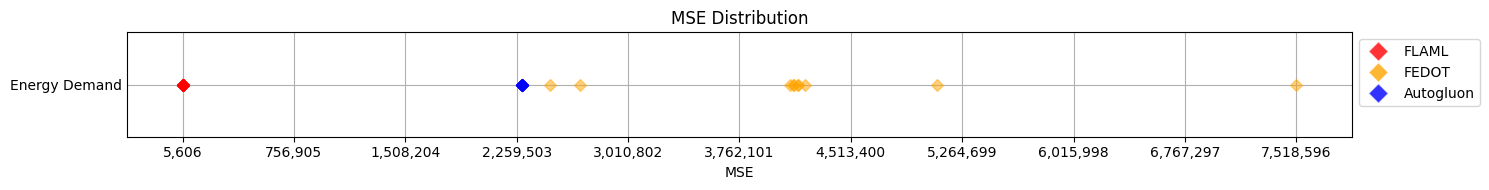

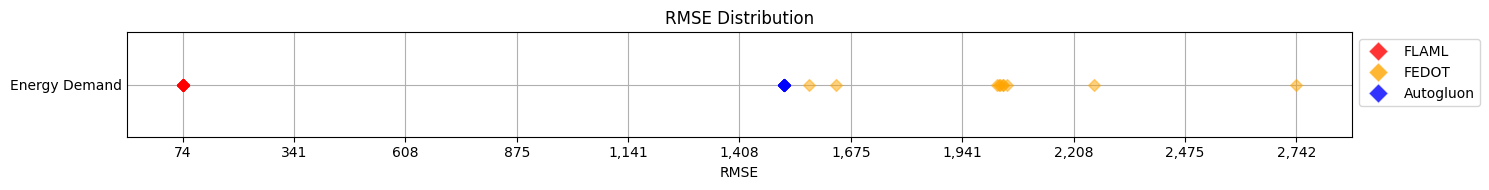

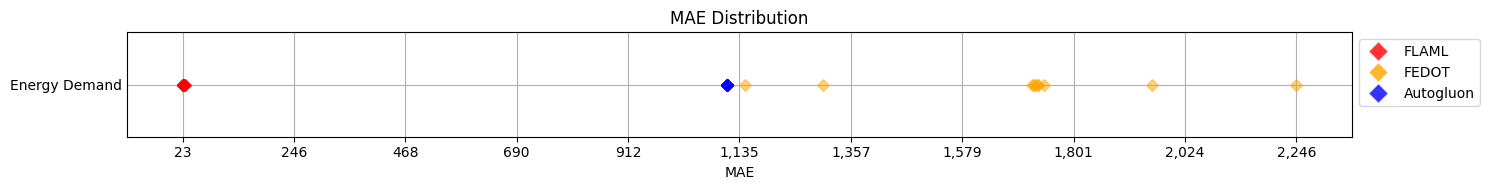

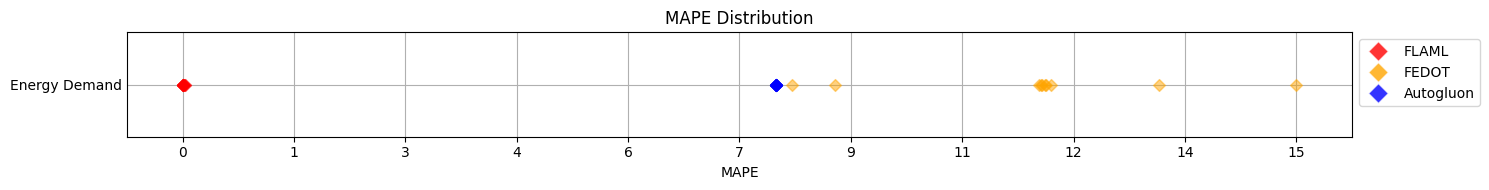

In [262]:
distribution("MSE")
distribution("RMSE")
distribution("MAE")
distribution("MAPE")

# Time analysis


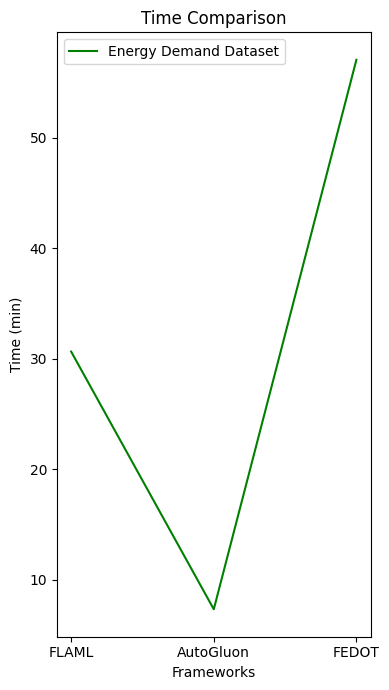

In [263]:
import matplotlib.pyplot as plt

categories = ['FLAML', 'AutoGluon', "FEDOT"]
energy_values = [round(FLAML_metrics["minutes"].mean(),4), round(auto_metrics["minutes"].mean(),4), round(fedot_metrics["minutes"].mean(),4)]


plt.figure(figsize=(4, 7))  

plt.plot(categories, energy_values, label='Energy Demand Dataset', color="green")

plt.xlabel('Frameworks')  
plt.ylabel('Time (min)')  
plt.title('Time Comparison')  
plt.legend() 

plt.tight_layout()  
plt.savefig("Mean time Energy Demand")
plt.show()  


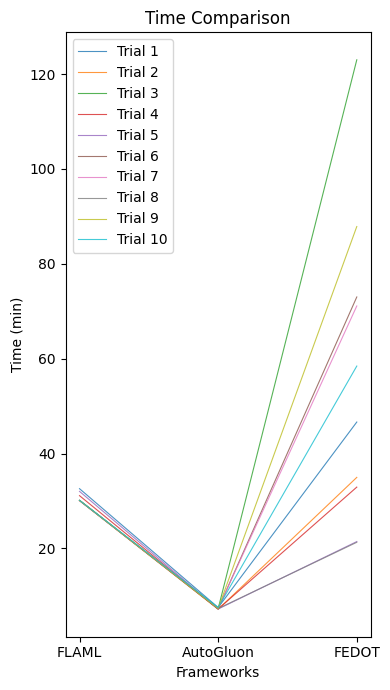

In [264]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['FLAML', 'AutoGluon', "FEDOT" ]

energy_values = []
num_iterations = 10  # 10 trials

for i in range(num_iterations):
    energy_values.append([FLAML_metrics["minutes"].iloc[i], auto_metrics["minutes"].iloc[i], fedot_metrics["minutes"].iloc[i]])

plt.figure(figsize=(4, 7))  

for i in range(num_iterations):
    plt.plot(categories, energy_values[i],  alpha=0.8, linewidth=0.8)

plt.xlabel('Frameworks')  
plt.ylabel('Time (min)')  
plt.title('Time Comparison')  

plt.legend([f'Trial {i+1}' for i in range(num_iterations)])

plt.tight_layout()  
plt.savefig("All Time Time Series")
plt.show()


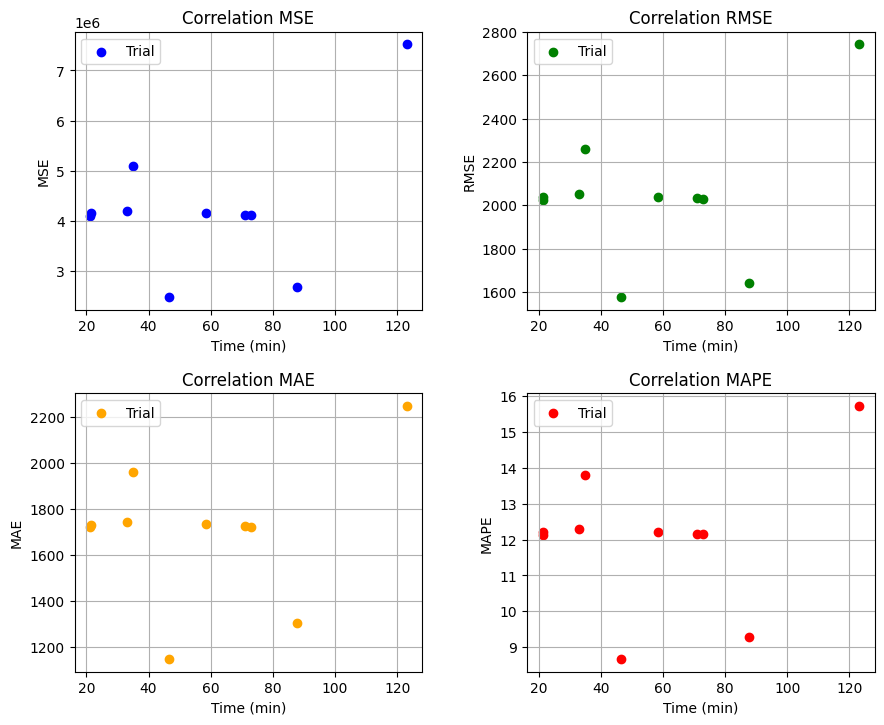

In [267]:

fig = plt.figure()
fig.set_figheight(8)
 
fig.set_figwidth(10)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
plt.subplot(2,2,1)
 
plt.scatter( fedot_metrics["minutes"], fedot_metrics["MSE"], color='blue', label='Trial')

plt.xlabel('Time (min)')
plt.ylabel('MSE')
plt.title('Correlation MSE')
# add grid
plt.grid(True)
plt.legend()


plt.subplot(2,2,2)
  
plt.scatter( fedot_metrics["minutes"],fedot_metrics["RMSE"], color='green', label='Trial')

plt.xlabel('Time (min)')
plt.ylabel('RMSE')
plt.title('Correlation RMSE')
# add grid
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
  
plt.scatter( fedot_metrics["minutes"], fedot_metrics["MAE"], color='orange', label='Trial')

plt.xlabel('Time (min)')
plt.ylabel('MAE')
plt.title('Correlation MAE')
# add grid
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
  
plt.scatter( fedot_metrics["minutes"],fedot_metrics["MAPE"], color='red', label='Trial')

plt.xlabel('Time (min)')
plt.ylabel('MAPE')
plt.title('Correlation MAPE')
# add grid
plt.grid(True)
plt.legend()

plt.savefig("scatterplot")
plt.show()

In [266]:
# calculate the correlations:
import scipy.stats
x1 = fedot_metrics["MSE"].to_numpy()
x2 = fedot_metrics["RMSE"].to_numpy()
x3 = fedot_metrics["MAE"].to_numpy()
x4 = fedot_metrics["MAPE"].to_numpy()
y =  fedot_metrics["minutes"].to_numpy()

print(np.corrcoef(x1, y))
print(np.corrcoef(x2, y))
print(np.corrcoef(x3, y))
print(np.corrcoef(x4, y))

[[1.         0.43055112]
 [0.43055112 1.        ]]
[[1.         0.36515262]
 [0.36515262 1.        ]]
[[1.         0.24443586]
 [0.24443586 1.        ]]
[[1.         0.24454255]
 [0.24454255 1.        ]]
